In [1]:
import librosa
import soundfile
import os, glob, pickle
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
#Extract features (mfcc, chroma, mel) from a sound file
def extract_feature(file_name, mfcc, chroma, mel):
    with soundfile.SoundFile(file_name) as sound_file:
        X = sound_file.read(dtype="float32")
        sample_rate=sound_file.samplerate
        if chroma:
            stft=np.abs(librosa.stft(X))
        result=np.array([])
        if mfcc:
            mfccs=np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)
            result=np.hstack((result, mfccs))
        if chroma:
            chroma=np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
            result=np.hstack((result, chroma))
        if mel:
            mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
            result=np.hstack((result, mel))
    return result

In [3]:
#Emotions in the RAVDESS dataset
emotions={
  '01':'neutral',
  '02':'calm',
  '03':'happy',
  '04':'sad',
  '05':'angry',
  '06':'fearful',
  '07':'disgust',
  '08':'surprised'
}
#Emotions to observe
observed_emotions=['calm', 'happy', 'fearful', 'disgust']

In [4]:
#Load the data and extract features for each sound file
def load_data(test_size=0.2):
    x,y=[],[]
    for file in glob.glob(r"C:\Users\tandi\OneDrive\Documents\FYP\VoiceData\\Actor_*\\*.wav"):
        file_name=os.path.basename(file)
        emotion=emotions[file_name.split("-")[2]]
        if emotion not in observed_emotions:
            continue
        feature=extract_feature(file, mfcc=True, chroma=True, mel=True)
        x.append(feature)
        y.append(emotion)
    return train_test_split(np.array(x), y, test_size=test_size, random_state=9)

In [5]:
X_train, X_test, y_train, y_test = load_data()

C:\Users\tandi\AppData\Local\Temp\ipykernel_3676\852816848.py:16: FutureWarning: Pass y=[0. 0. 0. ... 0. 0. 0.] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\tandi\AppData\Local\Temp\ipykernel_3676\852816848.py:16: FutureWarning: Pass y=[0.0000000e+00 3.0517578e-05 3.0517578e-05 ... 0.0000000e+00 0.0000000e+00
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\tandi\AppData\Local\Temp\ipykernel_3676\852816848.py:16: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00 -3.0517578e-05 ... -3.0517578e-05
 -3.0517578e-05 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\ta

C:\Users\tandi\AppData\Local\Temp\ipykernel_3676\852816848.py:16: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -6.1035156e-05
 -6.1035156e-05 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\tandi\AppData\Local\Temp\ipykernel_3676\852816848.py:16: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  0.0000000e+00
  0.0000000e+00 -6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\tandi\AppData\Local\Temp\ipykernel_3676\852816848.py:16: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -3.0517578e-05
 -3.0517578e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=

C:\Users\tandi\AppData\Local\Temp\ipykernel_3676\852816848.py:16: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00015259 -0.00036621
 -0.00048828] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\tandi\AppData\Local\Temp\ipykernel_3676\852816848.py:16: FutureWarning: Pass y=[-6.1035156e-05 -3.0517578e-05 -3.0517578e-05 ...  5.4931641e-04
  3.9672852e-04  2.4414062e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\tandi\AppData\Local\Temp\ipykernel_3676\852816848.py:16: FutureWarning: Pass y=[-9.1552734e-05 -6.4086914e-04 -5.1879883e-04 ... -6.1035156e-05
  2.4414062e-04  1.8310547e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.fe

C:\Users\tandi\AppData\Local\Temp\ipykernel_3676\852816848.py:16: FutureWarning: Pass y=[-3.0517578e-05 -3.0517578e-05 -3.0517578e-05 ...  0.0000000e+00
 -3.0517578e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\tandi\AppData\Local\Temp\ipykernel_3676\852816848.py:16: FutureWarning: Pass y=[-3.0517578e-05 -3.0517578e-05  0.0000000e+00 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\tandi\AppData\Local\Temp\ipykernel_3676\852816848.py:16: FutureWarning: Pass y=[-3.0517578e-05 -6.1035156e-05 -3.0517578e-05 ...  9.1552734e-05
  1.2207031e-04  9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=

C:\Users\tandi\AppData\Local\Temp\ipykernel_3676\852816848.py:16: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00 6.1035156e-05
 3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\tandi\AppData\Local\Temp\ipykernel_3676\852816848.py:16: FutureWarning: Pass y=[9.1552734e-05 6.1035156e-05 0.0000000e+00 ... 0.0000000e+00 0.0000000e+00
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\tandi\AppData\Local\Temp\ipykernel_3676\852816848.py:16: FutureWarning: Pass y=[0.         0.         0.         ... 0.00012207 0.00012207 0.00012207] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogra

C:\Users\tandi\AppData\Local\Temp\ipykernel_3676\852816848.py:16: FutureWarning: Pass y=[-6.1035156e-05 -6.1035156e-05 -9.1552734e-05 ... -6.1035156e-05
 -6.1035156e-05 -6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\tandi\AppData\Local\Temp\ipykernel_3676\852816848.py:16: FutureWarning: Pass y=[-3.0517578e-05 -3.0517578e-05 -6.1035156e-05 ... -1.2207031e-04
  6.4086914e-04  2.4414062e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\tandi\AppData\Local\Temp\ipykernel_3676\852816848.py:16: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -1.2207031e-04
 -9.1552734e-05 -1.2207031e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=

C:\Users\tandi\AppData\Local\Temp\ipykernel_3676\852816848.py:16: FutureWarning: Pass y=[ 2.7465820e-04  1.2207031e-04 -1.5258789e-04 ...  9.1552734e-05
  3.0517578e-05  6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\tandi\AppData\Local\Temp\ipykernel_3676\852816848.py:16: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -9.1552734e-05
 -6.1035156e-05 -6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\tandi\AppData\Local\Temp\ipykernel_3676\852816848.py:16: FutureWarning: Pass y=[-6.1035156e-05 -3.0517578e-05 -6.1035156e-05 ...  6.1035156e-05
  6.1035156e-05  3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=

C:\Users\tandi\AppData\Local\Temp\ipykernel_3676\852816848.py:16: FutureWarning: Pass y=[ 0.00018311  0.00018311  0.00018311 ... -0.00015259 -0.00015259
 -0.00018311] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\tandi\AppData\Local\Temp\ipykernel_3676\852816848.py:16: FutureWarning: Pass y=[-0.00012207 -0.00012207 -0.00012207 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\tandi\AppData\Local\Temp\ipykernel_3676\852816848.py:16: FutureWarning: Pass y=[3.0517578e-05 6.1035156e-05 6.1035156e-05 ... 3.0517578e-05 3.0517578e-05
 3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sampl

C:\Users\tandi\AppData\Local\Temp\ipykernel_3676\852816848.py:16: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00161743 -0.00164795
 -0.00161743] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\tandi\AppData\Local\Temp\ipykernel_3676\852816848.py:16: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -1.2207031e-04
 -1.2207031e-04 -9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\tandi\AppData\Local\Temp\ipykernel_3676\852816848.py:16: FutureWarning: Pass y=[-6.1035156e-05 -6.1035156e-05 -3.0517578e-05 ...  0.0000000e+00
 -3.0517578e-05 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.fe

C:\Users\tandi\AppData\Local\Temp\ipykernel_3676\852816848.py:16: FutureWarning: Pass y=[-3.0517578e-05 -3.0517578e-05 -3.0517578e-05 ... -6.1035156e-05
 -6.1035156e-05 -6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\tandi\AppData\Local\Temp\ipykernel_3676\852816848.py:16: FutureWarning: Pass y=[-3.0517578e-05 -6.1035156e-05 -3.0517578e-05 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\tandi\AppData\Local\Temp\ipykernel_3676\852816848.py:16: FutureWarning: Pass y=[-3.0517578e-05  0.0000000e+00 -3.0517578e-05 ...  0.0000000e+00
  0.0000000e+00  3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=

C:\Users\tandi\AppData\Local\Temp\ipykernel_3676\852816848.py:16: FutureWarning: Pass y=[6.1035156e-05 3.0517578e-05 6.1035156e-05 ... 0.0000000e+00 0.0000000e+00
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\tandi\AppData\Local\Temp\ipykernel_3676\852816848.py:16: FutureWarning: Pass y=[ 6.1035156e-05  6.1035156e-05  6.1035156e-05 ... -9.1552734e-05
 -9.1552734e-05 -6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\tandi\AppData\Local\Temp\ipykernel_3676\852816848.py:16: FutureWarning: Pass y=[-2.1362305e-04 -9.1552734e-05  0.0000000e+00 ... -1.2207031e-04
 -1.5258789e-04 -1.2207031e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mea

C:\Users\tandi\AppData\Local\Temp\ipykernel_3676\852816848.py:16: FutureWarning: Pass y=[-1.2207031e-04 -1.2207031e-04 -1.2207031e-04 ...  9.1552734e-05
  9.1552734e-05  1.2207031e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\tandi\AppData\Local\Temp\ipykernel_3676\852816848.py:16: FutureWarning: Pass y=[-3.0517578e-05 -3.0517578e-05 -3.0517578e-05 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\tandi\AppData\Local\Temp\ipykernel_3676\852816848.py:16: FutureWarning: Pass y=[ 0.00036621  0.00045776  0.00048828 ... -0.00021362 -0.00021362
 -0.00021362] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.fe

C:\Users\tandi\AppData\Local\Temp\ipykernel_3676\852816848.py:16: FutureWarning: Pass y=[3.0517578e-05 0.0000000e+00 3.0517578e-05 ... 0.0000000e+00 0.0000000e+00
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\tandi\AppData\Local\Temp\ipykernel_3676\852816848.py:16: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00057983 -0.00054932
 -0.00057983] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\tandi\AppData\Local\Temp\ipykernel_3676\852816848.py:16: FutureWarning: Pass y=[ 0.0000000e+00 -3.0517578e-05  0.0000000e+00 ...  3.0517578e-05
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.

In [6]:
#Get the shape of the training and testing datasets
print((X_train.shape[0], X_test.shape[0]))

(614, 154)


In [7]:
#Get the number of features extracted
print(f'Features extracted: {X_train.shape[1]}')

Features extracted: 180


In [79]:
#Initialize the Multi Layer Perceptron Classifier
model=MLPClassifier(random_state=10, alpha=0.01, batch_size=256, epsilon=1e-08, hidden_layer_sizes=(300,), learning_rate='adaptive', max_iter=500)

In [80]:
#Train the model
model.fit(X_train,y_train)

MLPClassifier(alpha=0.01, batch_size=256, hidden_layer_sizes=(300,),
              learning_rate='adaptive', max_iter=500, random_state=10)

In [81]:
#Predict for the test set
y_pred_test=model.predict(X_test)
y_pred_train=model.predict(X_train)

In [82]:
print('MLP_Train')
mlp_cr_test = classification_report(y_train, y_pred_train)
print(mlp_cr_test)
print('MLP_Test')
mlp_cr_test = classification_report(y_test, y_pred_test)
print(mlp_cr_test)

MLP_Train
              precision    recall  f1-score   support

        calm       0.75      0.98      0.85       148
     disgust       0.93      0.64      0.76       151
     fearful       0.98      0.76      0.86       159
       happy       0.77      0.94      0.84       156

    accuracy                           0.83       614
   macro avg       0.86      0.83      0.83       614
weighted avg       0.86      0.83      0.83       614

MLP_Test
              precision    recall  f1-score   support

        calm       0.72      0.95      0.82        44
     disgust       0.78      0.44      0.56        41
     fearful       0.73      0.58      0.64        33
       happy       0.60      0.78      0.67        36

    accuracy                           0.69       154
   macro avg       0.71      0.69      0.68       154
weighted avg       0.71      0.69      0.68       154



In [12]:
X_train.shape

(614, 180)

In [13]:
y_train

['disgust',
 'calm',
 'calm',
 'disgust',
 'calm',
 'calm',
 'disgust',
 'calm',
 'happy',
 'calm',
 'calm',
 'fearful',
 'happy',
 'happy',
 'calm',
 'happy',
 'happy',
 'happy',
 'disgust',
 'disgust',
 'happy',
 'fearful',
 'calm',
 'fearful',
 'happy',
 'happy',
 'disgust',
 'happy',
 'calm',
 'calm',
 'calm',
 'happy',
 'happy',
 'fearful',
 'happy',
 'happy',
 'disgust',
 'calm',
 'disgust',
 'fearful',
 'calm',
 'calm',
 'fearful',
 'fearful',
 'disgust',
 'calm',
 'calm',
 'happy',
 'calm',
 'disgust',
 'fearful',
 'disgust',
 'fearful',
 'disgust',
 'happy',
 'disgust',
 'fearful',
 'happy',
 'happy',
 'calm',
 'fearful',
 'disgust',
 'calm',
 'fearful',
 'disgust',
 'fearful',
 'calm',
 'calm',
 'happy',
 'fearful',
 'calm',
 'happy',
 'fearful',
 'calm',
 'fearful',
 'disgust',
 'calm',
 'disgust',
 'happy',
 'fearful',
 'happy',
 'fearful',
 'calm',
 'happy',
 'happy',
 'calm',
 'fearful',
 'disgust',
 'disgust',
 'disgust',
 'calm',
 'happy',
 'calm',
 'calm',
 'calm',
 'd

In [14]:
x_train_reshape = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
x_test_reshape = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [15]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
y_train_enc = ohe.fit_transform(np.array(y_train).reshape(-1,1))
y_test_enc = ohe.transform(np.array(y_test).reshape(-1,1))

In [16]:
y_test

['happy',
 'calm',
 'happy',
 'happy',
 'disgust',
 'calm',
 'happy',
 'happy',
 'disgust',
 'happy',
 'happy',
 'disgust',
 'happy',
 'happy',
 'disgust',
 'fearful',
 'calm',
 'happy',
 'disgust',
 'disgust',
 'calm',
 'disgust',
 'disgust',
 'calm',
 'happy',
 'happy',
 'disgust',
 'disgust',
 'calm',
 'calm',
 'happy',
 'disgust',
 'happy',
 'fearful',
 'fearful',
 'calm',
 'calm',
 'fearful',
 'calm',
 'calm',
 'happy',
 'disgust',
 'calm',
 'calm',
 'disgust',
 'calm',
 'disgust',
 'happy',
 'calm',
 'happy',
 'fearful',
 'fearful',
 'fearful',
 'fearful',
 'happy',
 'fearful',
 'disgust',
 'happy',
 'calm',
 'calm',
 'disgust',
 'calm',
 'disgust',
 'calm',
 'disgust',
 'calm',
 'calm',
 'disgust',
 'disgust',
 'happy',
 'fearful',
 'fearful',
 'fearful',
 'fearful',
 'fearful',
 'disgust',
 'fearful',
 'happy',
 'calm',
 'fearful',
 'disgust',
 'calm',
 'happy',
 'calm',
 'disgust',
 'fearful',
 'calm',
 'happy',
 'disgust',
 'fearful',
 'disgust',
 'disgust',
 'calm',
 'fearfu

In [17]:
y_test_enc.toarray()

array([[0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],


In [18]:
from keras.models import Sequential
import tensorflow as tf
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers import Dense
from keras.layers import Flatten

seed_num = 0
weight_init = tf.keras.initializers.RandomNormal(seed=seed_num)
bias_init = tf.keras.initializers.Zeros()

cnn = tf.keras.models.Sequential()
cnn.add(Conv1D(20, 3, activation='relu', input_shape=(x_train_reshape.shape[1], x_train_reshape.shape[2]), 
                  kernel_initializer=weight_init, bias_initializer=bias_init))
cnn.add(MaxPooling1D(2))
cnn.add(Flatten())
cnn.add(Dense(480, activation='relu', kernel_initializer=weight_init, bias_initializer=bias_init))
cnn.add(Dense(500, activation='relu', kernel_initializer=weight_init, bias_initializer=bias_init))
cnn.add(Dense(4, activation='sigmoid', kernel_initializer=weight_init, bias_initializer=bias_init))
cnn.compile(optimizer='adam', loss=tf.losses.BinaryCrossentropy(), metrics='accuracy') 

In [19]:
x_train_reshape

array([[[-5.18500488e+02],
        [ 5.00585823e+01],
        [-1.14344206e+01],
        ...,
        [ 4.87676880e-05],
        [ 3.57281824e-05],
        [ 2.55956420e-05]],

       [[-6.42891479e+02],
        [ 7.67089691e+01],
        [ 2.80970955e+00],
        ...,
        [ 4.64334062e-06],
        [ 2.52473501e-06],
        [ 1.17446143e-06]],

       [[-6.24773193e+02],
        [ 6.18993988e+01],
        [ 1.61996651e+01],
        ...,
        [ 3.24165230e-05],
        [ 3.35849872e-05],
        [ 1.60543805e-05]],

       ...,

       [[-5.50096191e+02],
        [ 1.70297680e+01],
        [-1.14575634e+01],
        ...,
        [ 1.51764631e-04],
        [ 1.16828531e-04],
        [ 8.47479314e-05]],

       [[-5.55357605e+02],
        [ 4.71569710e+01],
        [ 1.10750742e+01],
        ...,
        [ 1.61086457e-04],
        [ 1.04962470e-04],
        [ 6.52811723e-05]],

       [[-5.04816345e+02],
        [ 3.53618660e+01],
        [-1.43495789e+01],
        ...,
        

In [20]:
run_hist = cnn.fit(x_train_reshape, y_train_enc.toarray(), validation_data=(x_test_reshape, y_test_enc.toarray()), verbose=1, epochs=15)

Epoch 1/15
20/20 [==============================] - 1s 21ms/step - loss: 0.6981 - accuracy: 0.3664 - val_loss: 0.4943 - val_accuracy: 0.4610
Epoch 2/15
20/20 [==============================] - 0s 10ms/step - loss: 0.4927 - accuracy: 0.4495 - val_loss: 0.4719 - val_accuracy: 0.5065
Epoch 3/15
20/20 [==============================] - 0s 10ms/step - loss: 0.4501 - accuracy: 0.5358 - val_loss: 0.4673 - val_accuracy: 0.5390
Epoch 4/15
20/20 [==============================] - 0s 11ms/step - loss: 0.4315 - accuracy: 0.5505 - val_loss: 0.4635 - val_accuracy: 0.4935
Epoch 5/15
20/20 [==============================] - 0s 11ms/step - loss: 0.3905 - accuracy: 0.6433 - val_loss: 0.4282 - val_accuracy: 0.5325
Epoch 6/15
20/20 [==============================] - 0s 12ms/step - loss: 0.3621 - accuracy: 0.6808 - val_loss: 0.4276 - val_accuracy: 0.6104
Epoch 7/15
20/20 [==============================] - 0s 11ms/step - loss: 0.3636 - accuracy: 0.6629 - val_loss: 0.4054 - val_accuracy: 0.5519
Epoch 8/15
20

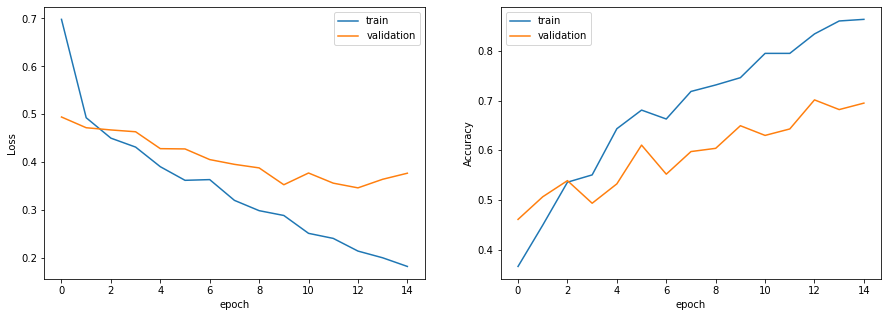

In [21]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))

plt.subplot(121)
plt.plot(run_hist.history['loss'], label='train')
plt.plot(run_hist.history['val_loss'], label='validation')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

plt.subplot(122)
plt.plot(run_hist.history['accuracy'], label='train')
plt.plot(run_hist.history['val_accuracy'], label='validation')
plt.xlabel("epoch")
plt.ylabel("Accuracy")
plt.legend()

In [22]:
cnnPredictTrain = cnn.predict(x_train_reshape)
cnnPredictTest = cnn.predict(x_test_reshape)

5/5 [==============================] - 0s 3ms/step


In [23]:
for i in range(len(cnnPredictTest)):
    max_index = cnnPredictTest[i].argmax()
    cnnPredictTest[i] = np.array([0, 0, 0, 0])
    cnnPredictTest[i][max_index] = 1
    
cnnPredictTest = cnnPredictTest.astype('int32')

In [24]:
for i in range(len(cnnPredictTrain)):
    max_index = cnnPredictTrain[i].argmax()
    cnnPredictTrain[i] = np.array([0, 0, 0, 0])
    cnnPredictTrain[i][max_index] = 1
    
cnnPredictTrain = cnnPredictTrain.astype('int32')

In [25]:
cnnPredictTrain = ohe.inverse_transform(cnnPredictTrain)
cnnPredictTest = ohe.inverse_transform(cnnPredictTest)

print('CNN_Train')
cnn_cr_train = classification_report(y_train, cnnPredictTrain)
print(cnn_cr_train)
print('CNN_Test')
cnn_cr_test = classification_report(y_test, cnnPredictTest)
print(cnn_cr_test)

CNN_Train
              precision    recall  f1-score   support

        calm       0.90      0.89      0.90       148
     disgust       0.80      0.89      0.84       151
     fearful       0.95      0.80      0.87       159
       happy       0.86      0.92      0.89       156

    accuracy                           0.87       614
   macro avg       0.88      0.87      0.87       614
weighted avg       0.88      0.87      0.87       614

CNN_Test
              precision    recall  f1-score   support

        calm       0.80      0.80      0.80        44
     disgust       0.61      0.56      0.58        41
     fearful       0.83      0.58      0.68        33
       happy       0.61      0.83      0.71        36

    accuracy                           0.69       154
   macro avg       0.71      0.69      0.69       154
weighted avg       0.71      0.69      0.69       154



In [26]:
cm_train = confusion_matrix(y_train, cnnPredictTrain)
cm_test = confusion_matrix(y_test, cnnPredictTest)

<AxesSubplot:>

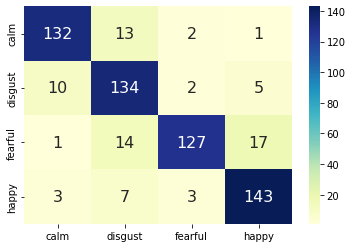

In [27]:
import seaborn as sns

sns.heatmap(cm_train, fmt='d', annot=True, cmap="YlGnBu", annot_kws={"size": 16}, xticklabels= ohe.categories_[0], yticklabels=ohe.categories_[0])

In [28]:
ohe.categories_[0]

array(['calm', 'disgust', 'fearful', 'happy'], dtype='<U7')

<AxesSubplot:>

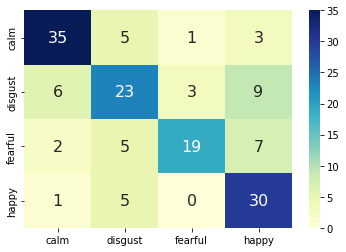

In [29]:
sns.heatmap(cm_test, fmt='d', annot=True, cmap="YlGnBu", annot_kws={"size": 16}, xticklabels= ohe.categories_[0], yticklabels=ohe.categories_[0])

In [30]:
# from sklearn.metrics import classification_report, confusion_matrix

# import tensorflow as tf
# from keras.models import Sequential
# from keras.layers import Dense
# from keras.layers import Flatten
# from keras.layers import Dropout
# from keras.layers.convolutional import Conv2D
# from keras.layers.convolutional import MaxPooling2D

# a = input('w:')
# neuron1 = 400
# neuron2 = 100

# while a != 'w':
#     seed_num = 0
#     weight_init = tf.keras.initializers.RandomNormal(seed=seed_num)
#     bias_init = tf.keras.initializers.Zeros()

#     cnn = tf.keras.models.Sequential()
#     cnn.add(Conv1D(20, 3, activation='relu', input_shape=(x_train_reshape.shape[1], x_train_reshape.shape[2]), 
#                   kernel_initializer=weight_init, bias_initializer=bias_init))
#     cnn.add(MaxPooling1D(2))
#     cnn.add(Flatten())
#     cnn.add(Dense(neuron1, activation='relu', kernel_initializer=weight_init, bias_initializer=bias_init))
#     cnn.add(Dense(neuron2, activation='relu', kernel_initializer=weight_init, bias_initializer=bias_init))
#     cnn.add(Dense(4, activation='sigmoid', kernel_initializer=weight_init, bias_initializer=bias_init))
#     cnn.compile(optimizer='adam', loss=tf.losses.BinaryCrossentropy(), metrics='accuracy')    

#     run_hist = cnn.fit(x_train_reshape, y_train_enc.toarray(), 
#                        validation_data=(x_test_reshape, y_test_enc.toarray()), verbose=1, epochs=15)

#     cnnPredictTrain = cnn.predict(x_train_reshape)
#     cnnPredictTest = cnn.predict(x_test_reshape)

#     for i in range(len(cnnPredictTest)):
#         max_index = cnnPredictTest[i].argmax()
#         cnnPredictTest[i] = np.array([0, 0, 0, 0])
#         cnnPredictTest[i][max_index] = 1
    
#     cnnPredictTest = cnnPredictTest.astype('int32')

#     for i in range(len(cnnPredictTrain)):
#         max_index = cnnPredictTrain[i].argmax()
#         cnnPredictTrain[i] = np.array([0, 0, 0, 0])
#         cnnPredictTrain[i][max_index] = 1
    
#     cnnPredictTrain = cnnPredictTrain.astype('int32')

#     cnnPredictTrain = ohe.inverse_transform(cnnPredictTrain)
#     cnnPredictTest = ohe.inverse_transform(cnnPredictTest)


#     cnn_cr_test = classification_report(y_test, cnnPredictTest, output_dict=True)
#     if(cnn_cr_test['accuracy'] > 0.70):
#         print('CNN_Train')
#         cnn_cr_train = classification_report(y_train, cnnPredictTrain)
#         print(cnn_cr_train)
#         print('CNN_Test')
#         cnn_cr_test = classification_report(y_test, cnnPredictTest)
#         print(cnn_cr_test)

#         print(neuron1)
#         print(neuron2)

#         a = input('w:')

#     neuron2 += 20
    
#     if neuron2 == 520:
#         neuron2 = 100
#         neuron1 += 20

#     if neuron1 > 1000:
#         a = input('w:')

In [31]:
# neuron1

In [32]:
# neuron2

In [33]:
# cnn.save('cnn')

In [74]:
from keras.models import load_model
cnn = load_model('cnn')

cnnPredictTrain = cnn.predict(x_train_reshape)
cnnPredictTest = cnn.predict(x_test_reshape)

for i in range(len(cnnPredictTest)):
    max_index = cnnPredictTest[i].argmax()
    cnnPredictTest[i] = np.array([0, 0, 0, 0])
    cnnPredictTest[i][max_index] = 1

cnnPredictTest = cnnPredictTest.astype('int32')

for i in range(len(cnnPredictTrain)):
    max_index = cnnPredictTrain[i].argmax()
    cnnPredictTrain[i] = np.array([0, 0, 0, 0])
    cnnPredictTrain[i][max_index] = 1

cnnPredictTrain = cnnPredictTrain.astype('int32')

cnnPredictTrain = ohe.inverse_transform(cnnPredictTrain)
cnnPredictTest = ohe.inverse_transform(cnnPredictTest)

print('Hybrid_Train')
cnn_cr_train = classification_report(y_train, cnnPredictTrain)
print(cnn_cr_train)
print('Hybrid_Test')
cnn_cr_test = classification_report(y_test, cnnPredictTest)
print(cnn_cr_test)

5/5 [==============================] - 0s 3ms/step
Hybrid_Train
              precision    recall  f1-score   support

        calm       0.82      0.91      0.86       148
     disgust       0.76      0.80      0.78       151
     fearful       0.98      0.77      0.86       159
       happy       0.84      0.88      0.86       156

    accuracy                           0.84       614
   macro avg       0.85      0.84      0.84       614
weighted avg       0.85      0.84      0.84       614

Hybrid_Test
              precision    recall  f1-score   support

        calm       0.75      0.82      0.78        44
     disgust       0.60      0.63      0.62        41
     fearful       0.83      0.61      0.70        33
       happy       0.69      0.75      0.72        36

    accuracy                           0.71       154
   macro avg       0.72      0.70      0.71       154
weighted avg       0.72      0.71      0.71       154



In [35]:
cnn.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_4 (Conv1D)           (None, 178, 20)           80        
                                                                 
 max_pooling1d_4 (MaxPooling  (None, 89, 20)           0         
 1D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 1780)              0         
                                                                 
 dense_12 (Dense)            (None, 400)               712400    
                                                                 
 dense_13 (Dense)            (None, 160)               64160     
                                                                 
 dense_14 (Dense)            (None, 4)                 644       
                                                      

In [36]:
import keras.backend as k

keras_function = k.function([cnn.input], [cnn.layers[4].output])
cnn_training = keras_function([x_train_reshape])[0]
cnn_testing = keras_function([x_test_reshape])[0]

In [37]:
cnn_training.shape

(614, 160)

In [38]:
cnn_testing.shape

(154, 160)

In [39]:
model_2  =MLPClassifier(alpha=0.01, batch_size=256, epsilon=1e-08, hidden_layer_sizes=(300,), learning_rate='adaptive', max_iter=500)
model_2.fit(cnn_training, y_train)
y_pred = model_2.predict(cnn_testing)
#Calculate the accuracy of our model
accuracy=accuracy_score(y_true=y_test, y_pred=y_pred)
#Print the accuracy
print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 74.03%


In [40]:
a = input('w:')
neuron1 = 300
neuron2 = 100

while a != 'w':
    model = MLPClassifier(alpha=0.01, batch_size=256, 
                        epsilon=1e-08, hidden_layer_sizes=(neuron1, neuron2), learning_rate='adaptive', max_iter=10)
    model.fit(cnn_training,y_train)
    y_pred=model.predict(cnn_testing)
    y_pred_train=model.predict(cnn_training)
    accuracy=accuracy_score(y_true=y_test, y_pred=y_pred)
    print("Accuracy: {:.2f}%".format(accuracy*100))

    cnn_cr_test = classification_report(y_test, y_pred, output_dict=True)
    if(cnn_cr_test['accuracy'] > 0.70):
        print('CNN_Train')
        cnn_cr_train = classification_report(y_train, y_pred_train)
        print(cnn_cr_train)
        print('CNN_Test')
        cnn_cr_test = classification_report(y_test, y_pred)
        print(cnn_cr_test)

        print(neuron1)

        a = input('w:')

    neuron2 += 20
    
    if neuron2 == 520:
        neuron2 = 100
        neuron1 += 20

    if neuron1 > 1000:
        a = input('w:')

w:w


In [41]:
# import pickle
# pickle.dump(model, open('MLP.pkl', 'wb'))